# Mlperf-Client

****User****: 
- *Call Batch Inference*
    1. Run batch workflow based on mlperf inference
- *Call Online Inference*
    1. start mlperf inference loadgen client
    2. send request to online-inference by using modified mlperf inference seldon server(using seldonclient)

In [1]:
import tensorflow as tf
model = tf.saved_model.load("../model/0", tags=None, options=None)

In [2]:
signatures = list(model.signatures.keys())
print(signatures)

['serving_default']


In [3]:
##Tips: the parameter model_name,input,output should be the same as defined inside signature.
infer = model.signatures['serving_default']
print(infer)

<ConcreteFunction pruned(input_image) at 0x2BA2F7F8FD00>


## Batch-inference Client

for batch-inference client, client similar as we did in dataengineer team, client could call 'run_workflow'.

In [ ]:
sudo cp -r data_imagenet/ /gpfs/bsc_home/xpliu/pv/scanflow-output/batch-inference-single-output/
sudo cp -r data_imagenet/ /gpfs/bsc_home/xpliu/pv/scanflow-output/batch-inference-graph-output/

In [14]:
await deployerClient.run_workflow(app_name='mlperf', 
                                  team_name='dataengineer',
                                  workflow = build_app.workflows[0])

22-Jun-21 10:13:23 -  INFO - [+] output dir /workflow
22-Jun-21 10:13:23 -  INFO - [+] Create batch-inference-single output PV
22-Jun-21 10:13:23 -  INFO - create_pv true
22-Jun-21 10:13:23 -  INFO - [+] Create batch-inference-single output PVC
22-Jun-21 10:13:23 -  INFO - create_pvc true
22-Jun-21 10:13:23 -  INFO - output dir created
22-Jun-21 10:13:23 -  INFO - env for executor {'AWS_ACCESS_KEY_ID': 'admin', 'AWS_SECRET_ACCESS_KEY': 'admin123', 'MLFLOW_S3_ENDPOINT_URL': 'http://minio.minio-system.svc.cluster.local:9000', 'AWS_ENDPOINT_URL': 'http://minio.minio-system.svc.cluster.local:9000', 'SCANFLOW_TRACKER_URI': 'http://scanflow-tracker-service.scanflow-system.svc.cluster.local', 'SCANFLOW_SERVER_URI': 'http://scanflow-server-service.scanflow-system.svc.cluster.local', 'SCANFLOW_TRACKER_LOCAL_URI': 'http://scanflow-tracker.scanflow-mlperf-dataengineer.svc.cluster.local'}
22-Jun-21 10:13:23 -  INFO - [+] Building workflow: [batch-inference-single:predictor-batch].
22-Jun-21 10:13:

OrderedDict([('apiVersion', 'argoproj.io/v1alpha1'), ('kind', 'Workflow'), ('metadata', {'name': 'batch-inference-single'}), ('spec', {'entrypoint': 'batch-inference-single', 'volumes': [OrderedDict([('name', 'outputpath'), ('persistentVolumeClaim', {'claimName': 'batch-inference-single'})]), OrderedDict([('name', 'scanflowpath'), ('persistentVolumeClaim', {'claimName': 'scanflow-scanflow-mlperf-dataengineer'})])], 'templates': [OrderedDict([('name', 'batch-inference-single'), ('dag', {'tasks': [OrderedDict([('name', 'predictor-batch'), ('template', 'predictor-batch'), ('arguments', OrderedDict([('parameters', [{'name': 'para-predictor-batch-0', 'value': '--dataset'}, {'name': 'para-predictor-batch-1', 'value': 'imagenet_tflocal'}, {'name': 'para-predictor-batch-2', 'value': '--dataset-path'}, {'name': 'para-predictor-batch-3', 'value': '/tmp/inference/vision/classification_and_detection/test_imagenet'}, {'name': 'para-predictor-batch-4', 'value': '--scenario'}, {'name': 'para-predicto

True

In [18]:
await deployerClient.run_workflow(app_name='mlperf', 
                                  team_name='dataengineer',
                                  workflow = build_app.workflows[1])

24-Jun-21 19:04:36 -  INFO - [+] output dir /workflow
24-Jun-21 19:04:36 -  INFO - [+] Create batch-inference-graph output PV
24-Jun-21 19:04:36 -  INFO - create_pv true
24-Jun-21 19:04:36 -  INFO - [+] Create batch-inference-graph output PVC
24-Jun-21 19:04:36 -  INFO - create_pvc true
24-Jun-21 19:04:36 -  INFO - output dir created
24-Jun-21 19:04:36 -  INFO - env for executor {'AWS_ACCESS_KEY_ID': 'admin', 'AWS_SECRET_ACCESS_KEY': 'admin123', 'MLFLOW_S3_ENDPOINT_URL': 'http://minio.minio-system.svc.cluster.local:9000', 'AWS_ENDPOINT_URL': 'http://minio.minio-system.svc.cluster.local:9000', 'SCANFLOW_TRACKER_URI': 'http://scanflow-tracker-service.scanflow-system.svc.cluster.local', 'SCANFLOW_SERVER_URI': 'http://scanflow-server-service.scanflow-system.svc.cluster.local', 'SCANFLOW_TRACKER_LOCAL_URI': 'http://scanflow-tracker.scanflow-mlperf-dataengineer.svc.cluster.local'}
24-Jun-21 19:04:36 -  INFO - [+] Building workflow: [batch-inference-graph:download-model].
24-Jun-21 19:04:36 -

OrderedDict([('apiVersion', 'argoproj.io/v1alpha1'), ('kind', 'Workflow'), ('metadata', {'name': 'batch-inference-graph'}), ('spec', {'entrypoint': 'batch-inference-graph', 'volumes': [OrderedDict([('name', 'outputpath'), ('persistentVolumeClaim', {'claimName': 'batch-inference-graph'})]), OrderedDict([('name', 'scanflowpath'), ('persistentVolumeClaim', {'claimName': 'scanflow-scanflow-mlperf-dataengineer'})])], 'templates': [OrderedDict([('name', 'batch-inference-graph'), ('dag', {'tasks': [OrderedDict([('name', 'download-model'), ('template', 'download-model'), ('arguments', OrderedDict([('parameters', [{'name': 'para-download-model-0', 'value': '--app_name'}, {'name': 'para-download-model-1', 'value': 'mlperf'}, {'name': 'para-download-model-2', 'value': '--team_name'}, {'name': 'para-download-model-3', 'value': 'dataengineer'}, {'name': 'para-download-model-4', 'value': '--model_name'}, {'name': 'para-download-model-5', 'value': 'mlperf-resnet'}])]))]), OrderedDict([('name', 'prepr

True

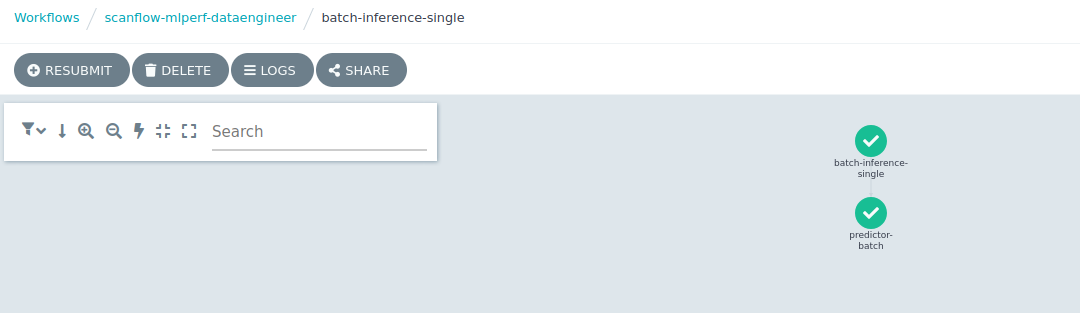

In [19]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/mlperf/batch-single.PNG", width=800, height=400)

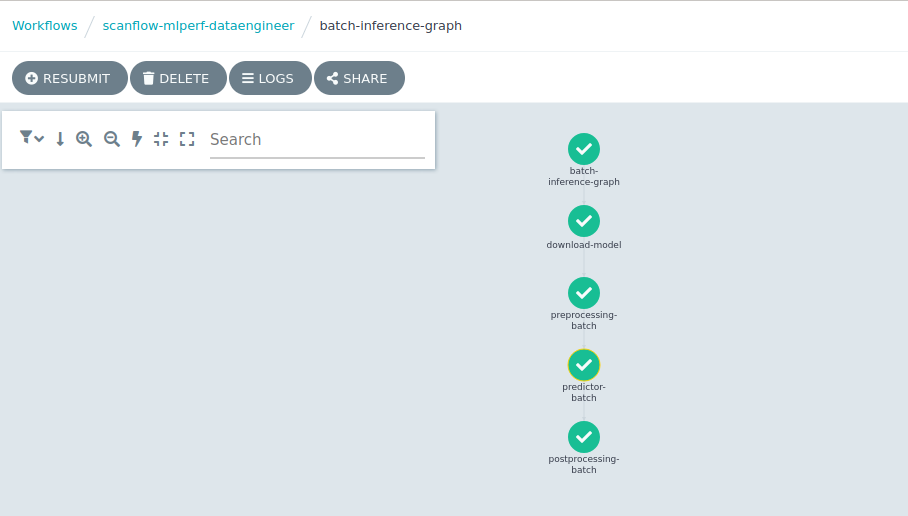

In [17]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/mlperf/batch-graph.PNG", width=800, height=400)

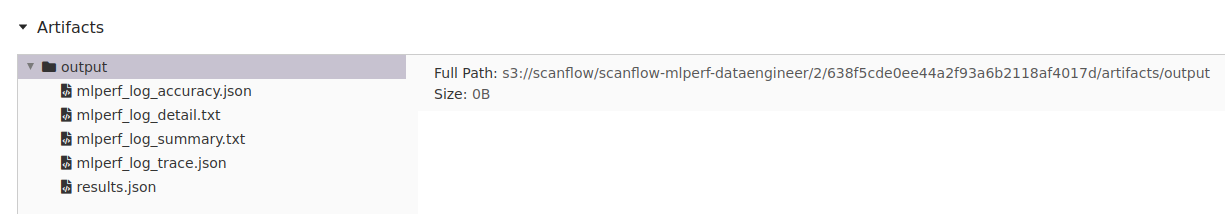

In [21]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/mlperf/postprocessing.PNG", width=800, height=400)

## Online-inference Client

1. start mlperf inference loadgen client on local or inside a pod
2. send request to online-inference by using modified mlperf inference seldon server(using seldonclient)

#### 1.1 start mlperf client loadgen inside a pod
```bash
kubectl apply -f mlperf.yaml
```

#### 1.2 start mlperf client loadgen locally

In [8]:
!cd /gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/ && sh run_scanflow_online.sh

parameter --mlperf_conf ../../mlperf.conf 18 --dataset imagenet_seldon_preprocessed --dataset-path data_imagenet --scenario SingleStream --model-name resnet50 --server 172.30.0.50:40000 --namespace scanflow-mlperf-dataengineer --deployment_name online-inference-single --backend seldon --output output
2021-11-16 15:43:06.736868: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/bsc_home/xpliu/mpi/wxparaver-4.8.2-Linux_x86_64/lib64:/gpfs/bsc_home/xpliu/mpi/clusteringsuite-2.6.9-Linux_x86_64/lib64:/gpfs/bsc_home/xpliu/mpi/extrae-3.7.1/build/bin:/gpfs/bsc_home/xpliu/mpi/folding-1.3.2-Linux_x86_64/lib64:/gpfs/bsc_home/xpliu/gcc-5.5.0/build/gcc-5.5.0/lib64:/gpfs/bsc_home/xpliu/openmpi-4.0.3rc3/build/lib:/gpfs/bsc_home/xpliu/spark/rdmasparklib::/gpfs/bsc_home/xpliu/mpi/libpfm-4.10.1/build/lib
2021-11-16 15:43:06.736933:

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00042467.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00040384.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00002369.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00000979.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
INFO:BackendSeldon:PEINI: number of response label 1
INFO:main:[[586]]
INFO:main:Call seldon predict
INFO:BackendSeldon:PEINI: number of response label 1
INFO:main:[[501]]
INFO:main:Call seldon predict
INFO:BackendSeldon:PEINI: number of response label 1
INFO:main:[[109]]
INFO:main:Call seldon predict
INFO:BackendSeldon:PEINI: number of response 

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00016991.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00047537.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00018363.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00045404.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00024072.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00014637.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00040568.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00003196.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00026507.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00049337.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00027850.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00033869.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00026841.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00030594.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00037954.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00002969.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00007106.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00030577.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00034809.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00033807.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00024321.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00032561.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00033174.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00002274.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00034491.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00047079.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00045160.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00014160.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00016217.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00015302.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00007754.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00031984.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00045039.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00026507.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00019263.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00008561.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00011696.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00020247.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00011110.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00043093.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00032561.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00042398.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00025647.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00007029.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00018596.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00006277.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00049723.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00030410.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00036987.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00021205.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00011688.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00034736.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00046107.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00011560.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00019263.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00014223.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00044718.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00019452.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00003822.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00028183.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

INFO:BackendSeldon:PEINI: number of response label 1
INFO:main:[[823]]
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00030146.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00021750.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
INFO:BackendSeldon:PEINI: number of response label 1
INFO:main:[[109]]
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00029914.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00015119.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00015303.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Cal

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00016622.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00009180.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00018966.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00033160.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00036087.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00040224.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00033295.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00049352.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00021507.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00025688.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00012101.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00013150.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00022180.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00044740.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00019829.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00040701.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00031883.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00036987.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00032803.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00029162.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00039304.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00030963.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00034080.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00046612.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00014160.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00014431.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00023595.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00024494.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00001798.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00035115.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00036041.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00014431.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00014252.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00034405.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00025574.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00035347.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai

ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00011547.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00003209.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00004770.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00025688.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00045518.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: failed on contentid=['data_imagenet/val/ILSVRC2012_val_00029283.JPEG'], 'NoneType' object has no attribute 'data'
INFO:main:Call seldon predict
ERROR:main:thread: fai